# Binding site comparison - current benchmark issues
> A (long) comment on current pitfalls on binding site comparison papers

- toc: true 
- badges: true
- comments: true
- categories: [binding site, pocket, cavity, pocket comparison, structure-based drug design]
- image: images/chart-preview.png

# Intro

First of all, what is written here is my personal viewpoint on the matter. It is conceivable that other people might have different opinions on this topic ;)

There has been a lot of interest on the comparison (in 3D) of binding sites since initiating work in that scope by Jambon et al. Today several methods exist, some of the freely available and some of the propriatary. 
I also got sucked into the field by the end of my PhD but never ended writing up papers about the whole topic. There are several reasons for that. The main one is likely laziness and total frustration with the scientific publishing & reviewing process. So now I decided to write things up gradually here and maybe one day I'll spend some time shaping that into a paper ;)

## What is binding site comparison?

In its simplest form, the fact to be able to compare two pockets from two structures and assess to what extent they are similar. You already see the various pitfalls in this definition. 
Binding site comparison could have some rather nice applications when applied on a larger scale (compare one or multiple binding sites to millions of others) in order to identify potential off-targets (or promiscuity prediction) or chemical matter that might bind in such an environment (drug repurposing or bioisosteric replacements, fragment based designs etc ...). 
Comparing binding sites is not a trivial task and the perception on how this should be done can vary significantly depending on the use-case or mind-set at hand.
Here are some potential use cases that require dedicated datasets & validation:
- idea generation in drug discovery (hit id & lead opt)
- polypharmacology prediction (toxicology)
- protein function prediction

## Existing literature

Today there are a lot of papers published on that topic. As usual with method development papers in science, with them a ton of ways proving that the authors' method is for sure always the best one compared to a small selected set of the other existing ones ... 
The field of binding site comparison lacked for a very long time a throuroughly built & commonly accepted benchmark dataset and this for various reasons. But in the end, we end up with the typical mess with a ton of methods each better than the other but not really comparable nor compared to one another. 

### Prospeccts

A recent (well now not so recent anymore ...) review article by Christiane Ehrt, Tobias Brinkhorst & Oliver Koch tries to address some of the historical shortcomings in the field. They summarize some approaches known today (not extensive, but representative). You can find them in table 1 of the [paper available here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6224041/):
(!https://journals.plos.org/ploscompbiol/article/figure?id=10.1371/journal.pcbi.1006483.t001). I fully understand that benchmarking a posteriori tens of different methods & developers must be daunting task & am really grateful the team tackled such an effort. 

The paper reuses / discusses some of the older datasets in the litterature, so I won't loose too much time on that here. 

Ehrt et al also touch upon a different topic in that paper: a dataset to benchmark a method depends on the scope of capabilities you want to test your method on. That's a reality that was simply absent from validations before. If you want to prove that your method is capable of detecting remote relationships between binding sites on very different proteins known to bind similar ligands (or not), you have to actually validate that on a relevant dataset. This is a particular scope that was at the center of another "recent" dataset effort - discussed a bit further below.

### TOUGH dataset
[Link to the paper](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-018-2109-2)
This dataset was introduced by Govindaraj & Brylinski the same year as the publication of prospeccts. It is an interesting one, because it focuses on one of the "dreams" in the binding site comparison community: "Two very different binding sites known to bind a similar ligand, must be to some extent similar". I'll come to that statement a bit later.
Basically their viewpoint is that some of the previous studies had performances published that were too good, because the underlying protein structures used in the binding site comparison evaluation were too similar. 

So they set up a process to generate a more challenging ("tough") dataset for such methods as described in [figure 1 of that paper](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-018-2109-2/figures/1)

I'm currently still trying to wrap my head around the actual procedure and its potential advantages & drawbacks but have to admit that the process is as so often not reproducible as is. So one has to live with the dataset established in 2018, which itself also difficult to reproduce for reasons I won't elaborate further - but a few [lines of code from a paper about deeplytough from benevolent](https://github.com/BenevolentAI/DeeplyTough/blob/master/datasets_downloader.sh) actually helped to get to the actual dataset at least.

### Kahraman dataset
[Link to paper](https://onlinelibrary.wiley.com/doi/abs/10.1002/prot.22633) That's historically the most used & cited one in the field and it was developed for a totally different purpose. To highlight that, find here the abstract from that paper: 
> Most function prediction methods that identify cognate ligands from binding site analyses work on the assumption of molecular complementarity. **These approaches build on the conjectured complementarity of geometrical and physicochemical properties between ligands and binding sites so that similar binding sites will bind similar ligands. We found that this assumption does not generally hold for protein–ligand interactions** and observed that it is not the chemical composition of ligand molecules that dictates the complementarity between protein and ligand molecules, but that the ligand's share within the functional mechanism of a protein determines the degree of complementarity. Here, we present for a set of cognate ligands a descriptive analysis and comparison of the physicochemical properties that each ligand experiences in various nonhomologous binding pockets. The comparisons in each ligand set reveal large variations in their experienced physicochemical properties, suggesting that the same ligand can bind to distinct physicochemical environments. In some protein ligand complexes, the variation was found to correlate with the electrochemical characteristic of ligand molecules, whereas in others it was disclosed as a prerequisite for the biochemical function of the protein. To achieve binding, proteins were observed to engage in subtle balancing acts between electrostatic and hydrophobic interactions to generate stabilizing free energies of binding. For the presented analysis, a new method for scoring hydrophobicity from molecular environments was developed showing high correlations with experimental determined desolvation energies. The presented results highlight the complexities of molecular recognition and underline the challenges of computational structural biology in developing methods to detect these important subtleties. Proteins 2010. © 2009 Wiley-Liss, Inc.

How on earth did this end up as benchmark dataset for binding site comparison?
The conclusions of that paper are a very interesting read and if you have the chance to have access to the paper I invite you to read them.



# Similar binding sites bind similar ligands and vice versa

Let me list a few citations here to clarify my point: 
> Our approach makes the basic assumption that proteins which bind similar ligands have clefts of similar size, shape and chemistry.
from [Morris et al](https://academic.oup.com/bioinformatics/article/21/10/2347/206780) and the authors of the Kahraman paper above ... 

> Similarity in ligand binding sites can indicate common binding modes and recognition of similar molecules ...
from [Gold and Jackson](https://www.sciencedirect.com/science/article/abs/pii/S0022283605014452)

> Assuming that similar ligands bind to similar cavities, function and ligands for a novel protein may be inferred from structurally similar liganded cavities
from [Weill et al](https://pubs.acs.org/doi/10.1021/ci900349y)

And there are many more. Interestingly, this statement has been the basis to establish some of the first binding site comparison benchmarks used in the litterature and the example cited about the TOUGH dataset above.

This results in a very early and widely used benchmark dataset of 40 structures binding either a steroid, NAD, ATP and heme groups. You can already imagine that in terms of applications to drug-discovery this might be of limited interest. What is more disturbing to me here, establishing these sets (and others around the same principle), is that if a protein binds the same ligand, its binding site should be somehow related / similar to some extent. Yes in some cases that's true, but using it as a ground truth statement is an oversimplification, which was actually also stated by the authors of that paper.

According to what we know so far (or at least that's how I understood it), a [binding site can be promiscuous](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6680532/) and ligands can be promiscuous as well. There are very well known examples of proteins binding a whole range of ligands even though their binding sites have nothing in common with the intended target in the drug discovery project. Take for instance the HERG channel or CYP P450 ... all of them are able to bind a variety of ligands despite the disimilarity of their binding sites compared to the intended targets. Another hallmark of such promiscuous binding sites is their hydrophobicity and presence of short sidechains in the binding vicinity (Cerisier et al cited above) - this poses particular challenges to binding site comparison methods as stated as well by Ehrt et al. And these are only unwanted off-targets we know about because they impede on how you imagine your drug interacts inside and outside the cell. 

On the other hand, ligands can also expose particular functional groups that yield either very specific interactions and thus a narrow biological profile (hitting only a few targets), or on the contrary, they can bind on a large variety of binding sites of different proteins (frequent hitters, promiscuous binders and all of the molecules in the shadow zone in between promiscuous and specific). 

Also, in order to establish datasets based on this assumption one requires the actual data, so reliable structures with compound A in target X and a similar compound B in totally different target Y and their exact location of interaction. If your compound B has a very narrow biological footprint (hits only a few targets specifically) then you might be lucky. However, if your compound B is a frequent hitter then what is the relevance of that relation? You'd associate target X to a whole lot of other targets hit by a promiscuous compound.

When using binding site comparison methods in the scope of protein function prediction such approximation might be relevant or event wanted. However I doubt they have relevance in the scope of drug discovery applications.

## A quick peek into the TOUGH-M1 dataset

The paper introducing the TOUGH dataset didn't include a single figure showing what types of binding sites & thus ligands were selected to establish the benchmark dataset. So to get a glimpse of that here I'll show a set of the most common clusters of molecules in their "positive" dataset, so a set of binding sites to be compared to others binding similar ligands. 

### A bit of code

Let's read in the positive list from the TOUGH-M1 dataset and read all sd files available in the distributed version of the dataset.

In [104]:
#collapse-hide

# prerequisit: get the zip file and unzip to a folder of your choice: wget https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/L7H7JJ/UFO5CB 
# get the positive list from the TOUGH-M1 set from the SI of the paper itself

import pandas as pd
from pathlib import Path
from rdkit import Chem

positiveList=pd.read_csv("/Users/peter/Work/subpocket/datasets/toughM1/TOUGH-M1_positive.list",delim_whitespace=True)
uniquePdbCodes=positiveList.iloc[:, 0].unique()
print("Number of distinct PDB structures: {}".format(len(uniquePdbCodes)))
molecules=[]
for pdbCode in uniquePdbCodes:
    sdFilePath='/Users/peter/Work/subpocket/datasets/toughM1/TOUGH-M1_dataset/'+pdbCode+'/'+pdbCode+'00.sdf'
    for mol in Chem.SDMolSupplier(sdFilePath,removeHs=False,sanitize=True):
        if mol:
            mol.RemoveAllConformers()
            molecules.append(mol)

print("Read {} molecules".format(len(molecules)))

Number of distinct PDB structures: 5965


[11:41:57] Explicit valence for atom # 42 N, 4, is greater than permitted
[11:41:57] ERROR: Could not sanitize molecule ending on line 96
[11:41:57] ERROR: Explicit valence for atom # 42 N, 4, is greater than permitted
[11:41:57] Explicit valence for atom # 41 C, 5, is greater than permitted
[11:41:57] ERROR: Could not sanitize molecule ending on line 94
[11:41:57] ERROR: Explicit valence for atom # 41 C, 5, is greater than permitted
[11:42:07] Explicit valence for atom # 9 N, 4, is greater than permitted
[11:42:07] ERROR: Could not sanitize molecule ending on line 25
[11:42:07] ERROR: Explicit valence for atom # 9 N, 4, is greater than permitted
[11:42:07] Explicit valence for atom # 9 N, 4, is greater than permitted
[11:42:07] ERROR: Could not sanitize molecule ending on line 25
[11:42:07] ERROR: Explicit valence for atom # 9 N, 4, is greater than permitted
[11:42:07] Explicit valence for atom # 9 N, 4, is greater than permitted
[11:42:07] ERROR: Could not sanitize molecule ending on

Read 5917 molecules


First of all you notice that a few molecules cannot be read. I won't go too much into detail, but feel free to peek in here which ones these are & how this could happen. Now let's do a very basic clustering just to get a rough idea on what the dataset looks like.

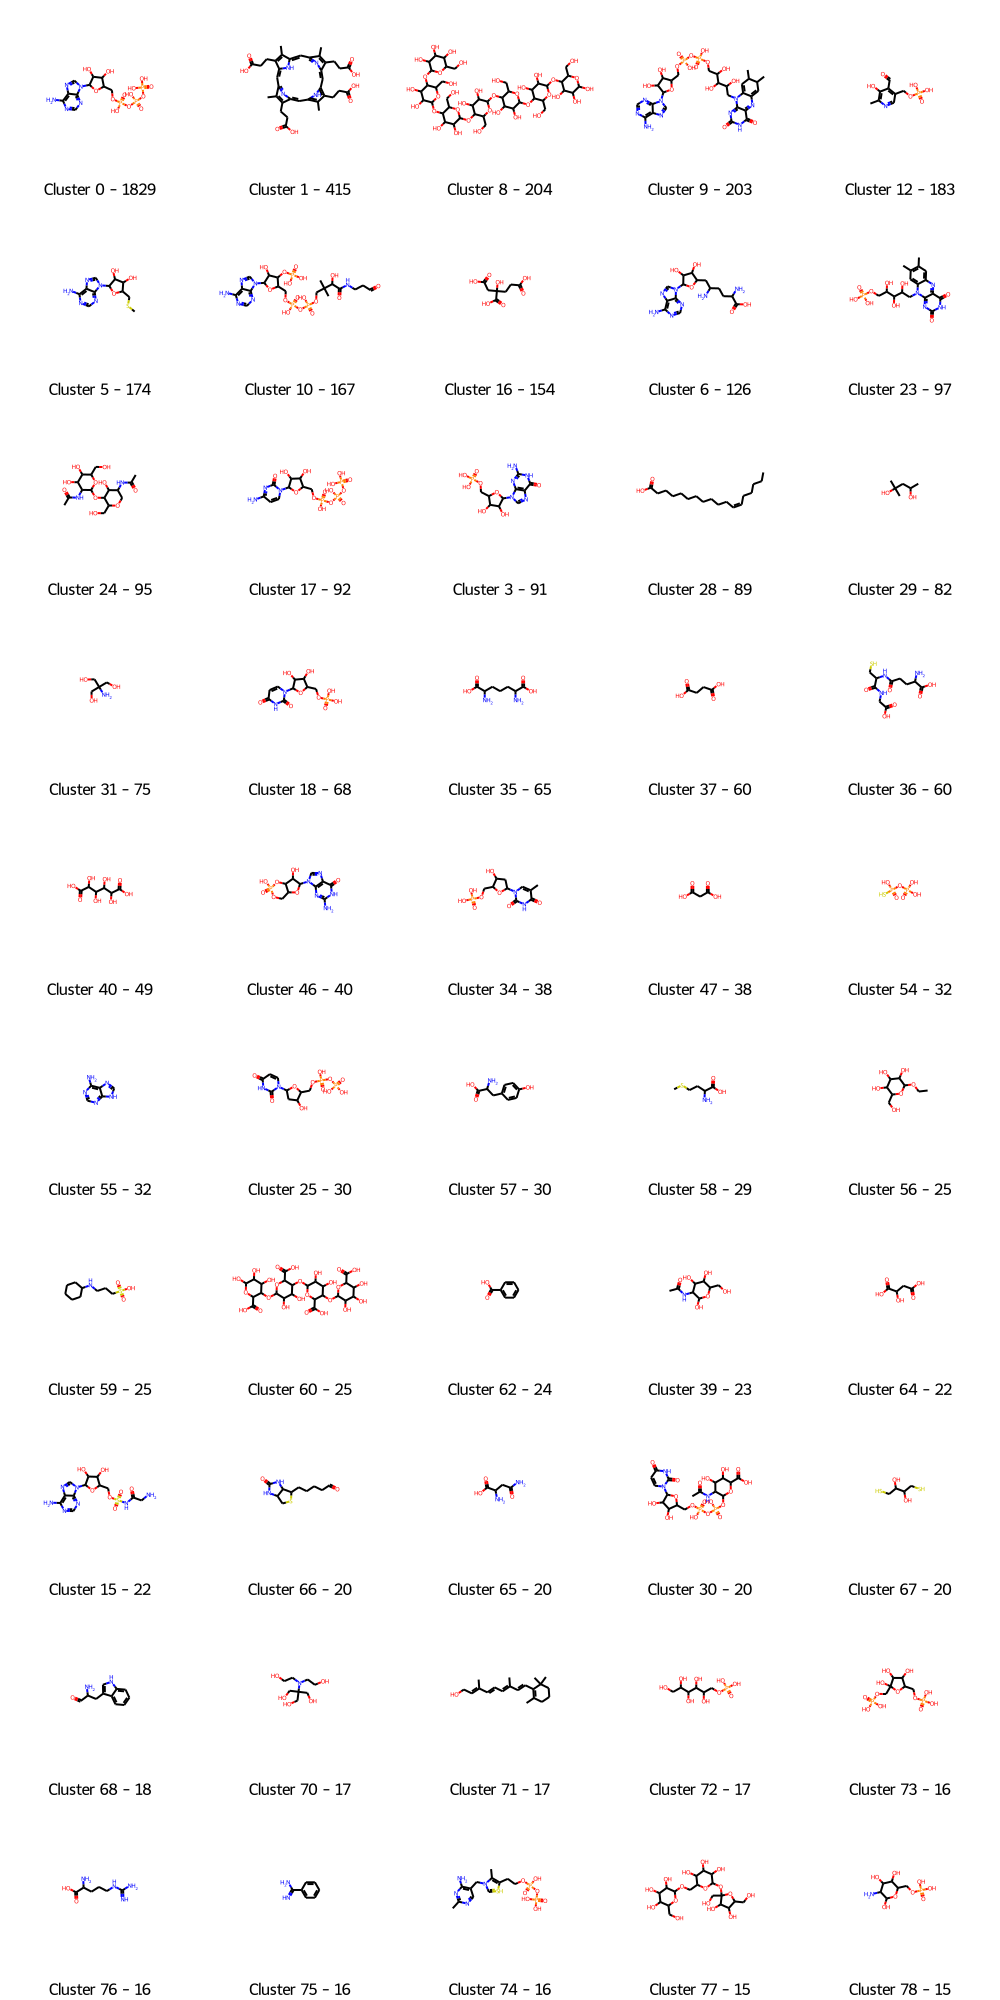

In [105]:
#collapse-hide

from rdkit.Chem import AllChem
import numpy as np

#Define clustering setup
def ClusterFps(fps,cutoff=0.2):
    from rdkit import DataStructs
    from rdkit.ML.Cluster import Butina

    # first generate the distance matrix:
    dists = []
    nfps = len(fps)
    for i in range(1,nfps):
        sims = DataStructs.BulkTanimotoSimilarity(fps[i],fps[:i])
        dists.extend([1-x for x in sims])
    cs = Butina.ClusterData(dists,nfps,cutoff,isDistData=True)
    return cs

fps = [AllChem.GetMorganFingerprintAsBitVect(mol,2,1024) for mol in molecules if mol]
clusters=ClusterFps(fps,cutoff=0.4)
clusterSizes=np.array([len(cluster) for cluster in clusters])
sortedClusterIndices=np.argsort(clusterSizes)[::-1]
selectedSizes=clusterSizes[sortedClusterIndices]
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
mols=[molecules[clusters[sortedClusterIndices[idx]][0]] for idx in range(0,50)]
legend=["Cluster "+str(sortedClusterIndices[idx])+" - "+str(s) for idx,s in enumerate(selectedSizes[:50])]
Draw.MolsToGridImage(mols,molsPerRow=5,legends=legend)


In [106]:
#collapse-hide
# Here is a bit of code if you want ot get a peek into each cluster, did that but won't show the results. Overall they look fairly clean: 
#mols=[molecules[clusters[sortedClusterIndices[0]][idx]] for idx in range(0,50)]
#Draw.MolsToGridImage(mols,molsPerRow=5)

### Results

The majority of the dataset is composed of nucleotides /-sides, sugars & derivatives ... ah and hemes. We can also find what we usually would consider as crystallographic surfactants, a few lipids as well. 
In other words, the overall composition of the dataset appears to be somehow close to the Kahraman dataset despite being on a different scale (5000 structures versus 40 roughly). Here again I'd argue that such a dataset is useful in the scope of protein function prediction, but I doubt it's the best suited for drug discovery. 

# Going beyond Prospeccts

The prospeccts dataset discussed earlier was the first systematic attempt to establish a benchmark set for validation of pocket comparison algorithms in general, even though with a stronger focus on applications in drug discovery. 


# Similar folds contain similar binding sites

Another one commonly used is the SCOP classification (or successors). Here the main idea is that 


# Decoys

## Markdown Shortcuts

A `#hide` comment at the top of any code cell will hide **both the input and output** of that cell in your blog post.

A `#hide_input` comment at the top of any code cell will **only hide the input** of that cell.

In [ ]:
#hide_input
print('The comment #hide_input was used to hide the code that produced this.')

The comment #hide_input was used to hide the code that produced this.


put a `#collapse-hide` flag at the top of any cell if you want to **hide** that cell by default, but give the reader the option to show it:

In [ ]:
#collapse-hide
import pandas as pd
import altair as alt

put a `#collapse-show` flag at the top of any cell if you want to **show** that cell by default, but give the reader the option to hide it:

In [ ]:
#collapse-show
cars = 'https://vega.github.io/vega-datasets/data/cars.json'
movies = 'https://vega.github.io/vega-datasets/data/movies.json'
sp500 = 'https://vega.github.io/vega-datasets/data/sp500.csv'
stocks = 'https://vega.github.io/vega-datasets/data/stocks.csv'
flights = 'https://vega.github.io/vega-datasets/data/flights-5k.json'

place a `#collapse-output` flag at the top of any cell if you want to put the output under a collapsable element that is closed by default, but give the reader the option to open it:

In [ ]:
#collapse-output
print('The comment #collapse-output was used to collapse the output of this cell by default but you can expand it.')

The comment #collapse-output was used to collapse the output of this cell by default but you can expand it.
